# Cinsiyet Sınıflandırma Projesi 

### Bu projemde saç uzunluğu, burun ve alın genişliği gibi yüz yapısı özelliklerini içeren dataseti kullanarak cinsiyet tahmini yaptırdım.
Projede kullandığım veri seti : gender_classification_v7.csv


<b>Bu veri seti 8 sütundan oluşmaktadır.</b>

<b>long hair:</b> Boolean özellik. Eğer saç uzun ise 1, değilse 0.\
<b>forehead_width_cm:</b> Alın genişliğinin cm türünden ölçüsü.\
<b>forehead_height_cm:</b> Alın uzunluğunun cm türünden ölçüsü.\
<b>nose_wide:</b> Boolean özellik. Eğer burun geniş ise 1, ince ise 0.\
<b>nose_long:</b> Boolean özellik. Eğer burun uzun ise 1, kısa ise 0.\
<b>lips_thin:</b> Boolean özellik. Eğer dudak ince ise 1, kalın ise 0.\
<b>distance_nose_to_lip_long:</b> boolean özellik. Eğer dudak ile burun arasındaki mesafe kısa ise 0, uzun ise 1.\
<b>gender:</b> Erkek veya kadın

<B>Not </b>- Cm türünden değerler popülasyondaki ilgili parametrelerin ortalama hesaplamasından sonra tanımlanacaktır.
    
    

In [2]:
#Gerekli kütüphanelerin yüklenmesi.
import numpy as np 
import pandas as pd

#Görselleştirme kütüphanelerinin yüklenmesi 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from numpy import cov

In [3]:
#Veri setinin yüklenmesi.
person=pd.read_csv('gender_classification_v7.csv')
person


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
#tablo hakkında bilgiler.
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


<br>

<b> Veri setinde 5000 satır and 8 sütun vardır. <br>
Veri setinde boş değer yoktur.<b>
    


## Cinsiyet
Tahmin ettirmek istediğim değer cinsiyettir. Her bir cinsiyetten kaçar tane örnek olduğunu görelim.


In [7]:
person.gender.value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

## Cinsiyete Göre Ortalama Bulma
Tahmin yaparken özelliklerin ortalama değerleri baz alınacaktır. Bu kodda ortalama değerleri iki cinsiyet için de görebiliriz:

In [10]:
gender1=person.groupby(['gender']).mean()
gender1

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender,,,,,,,
Female,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551
Male,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400


## Görselleştirme

<Figure size 1440x1440 with 0 Axes>

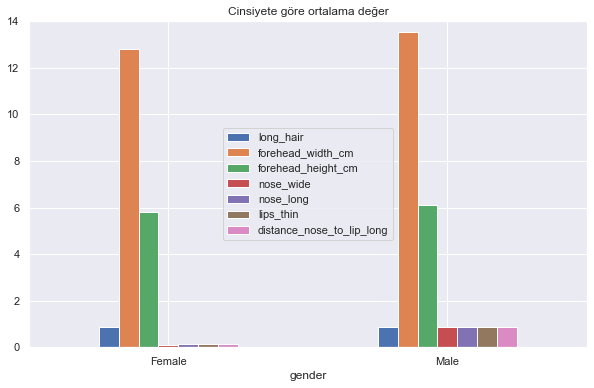

In [12]:
#Bar plot ile tablo olarak gösterelim:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(20,20))
gender2=gender1.plot(kind='bar',figsize=(10,6))

for item in gender2.get_xticklabels():
    item.set_rotation(0)
    
plt.ylim(0.0, 14.0)
plt.legend(loc='center')
plt.title('Cinsiyete göre ortalama değer')
plt.show()

<B>Tüm özelliklerin (saç uzunluğu hariç) erkeklerde kadınlara göre daha yüksek değerler aldığını görebiliriz. Daha detaylı incelersek:

### Dudak Kalınlığının ve Dudak-Burun Mesafesinin Cinsiyete Göre Dağılımı  : 

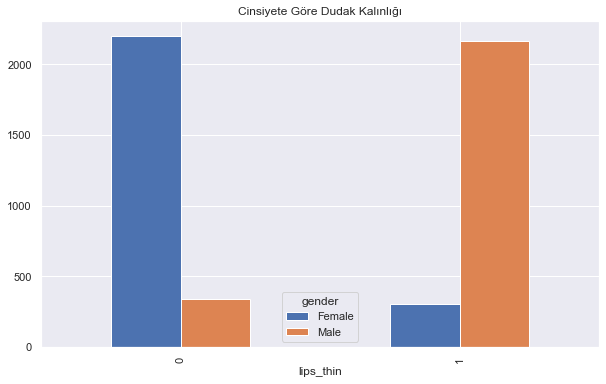

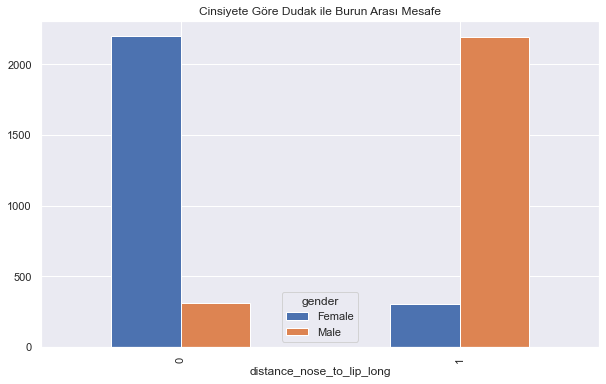

lips_thin  gender
0          Female    2197
           Male       338
1          Female     304
           Male      2162
dtype: int64

In [11]:
person.groupby(['lips_thin','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('Cinsiyete Göre Dudak Kalınlığı')
person.groupby(['distance_nose_to_lip_long','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('Cinsiyete Göre Dudak ile Burun Arası Mesafe')
plt.show()
person.groupby(['lips_thin','gender']).size()


In [14]:
person.groupby(['distance_nose_to_lip_long','gender']).size()

distance_nose_to_lip_long  gender
0                          Female    2197
                           Male       309
1                          Female     304
                           Male      2191
dtype: int64

<b>Kadınların erkeklere göre daha geniş dudaklara ve daha kısa burun-dudak arası mesafeye sahip olduğunu görebiliriz.

## Alın Genişliği ve Uzunluğunun Cinsiyete Göre Dağılımı:

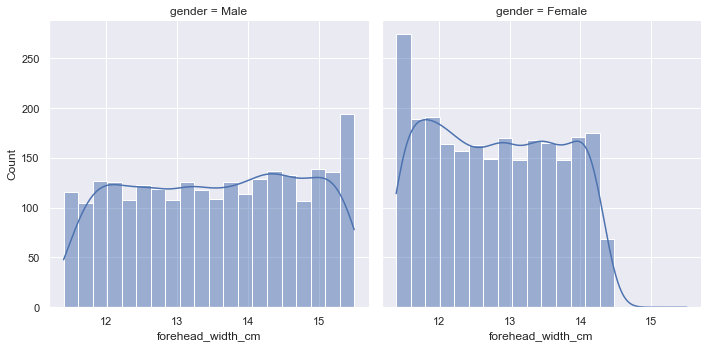

In [15]:
#Alın Genişliğinin Dağılımını Bar Plot ile Gösterelim.
sns.displot(data=person, x="forehead_width_cm", col="gender",kde=True, color='b')

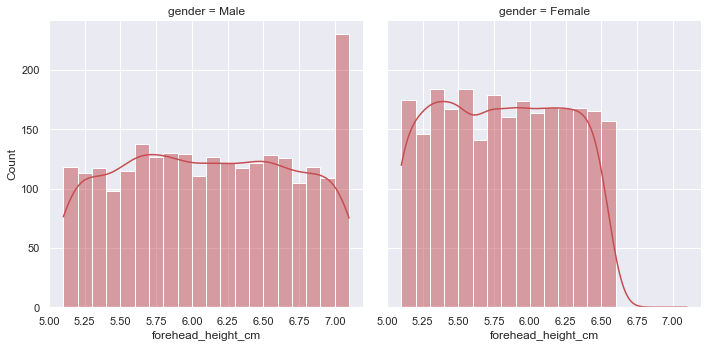

In [16]:
#Alın Uzunluğunun Dağılımını Bar Plot ile Gösterelim.
sns.displot(data=person, x="forehead_height_cm", col="gender",kde=True, color='r' )


* <B>Erkeklerin kadınlara göre daha geniş ve uzun alına sahip olduğunu görebiliriz.

## Saç Uzunluğunun Cinsiyete Göre Dağılımı:

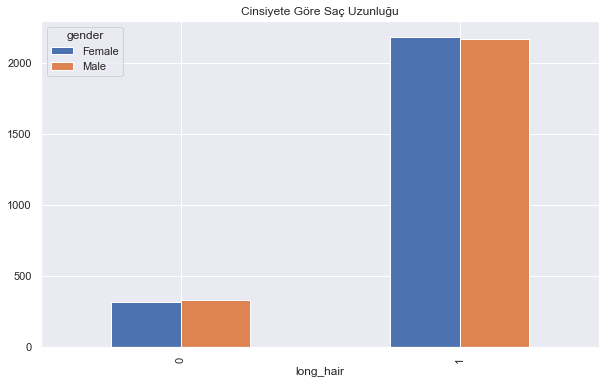

long_hair  gender
0          Female     317
           Male       335
1          Female    2184
           Male      2165
dtype: int64

In [17]:
person.groupby(['long_hair','gender']).size().unstack().plot(kind='bar',figsize=(10,6))

plt.title('Cinsiyete Göre Saç Uzunluğu')
plt.show()
person.groupby(['long_hair','gender']).size()

* <B> Kadınlar ile erkekler arasında saç uzunluğu dağılımının neredeyse aynı olduğunu görebiliriz.

## Burun Genişliği ve Uzunluğunun Cinsiyete Göre Dağılımı:

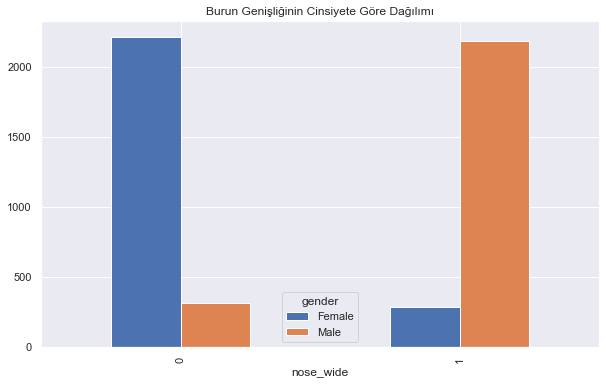

nose_wide  gender
0          Female    2214
           Male       317
1          Female     287
           Male      2183
dtype: int64

In [24]:
person.groupby(['nose_wide','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('Burun Genişliğinin Cinsiyete Göre Dağılımı')
plt.show()
person.groupby(['nose_wide','gender']).size()

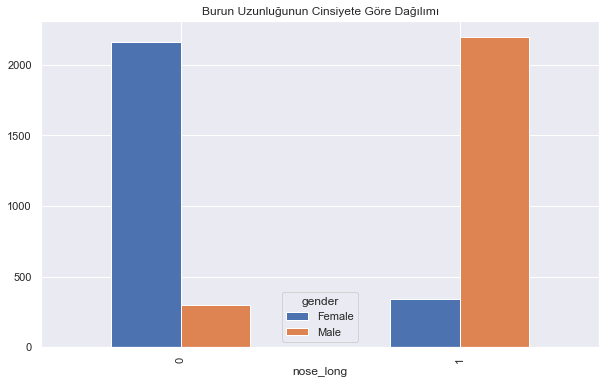

nose_long  gender
0          Female    2161
           Male       300
1          Female     340
           Male      2200
dtype: int64

In [23]:
person.groupby(['nose_long','gender']).size().unstack().plot(kind='bar',figsize=(10,6))
plt.title('Burun Uzunluğunun Cinsiyete Göre Dağılımı')
plt.show()
person.groupby(['nose_long','gender']).size()

* <B> Kadınların erkeklere göre daha ince ve kısa buruna sahip olduğunu görebiliriz.

### Veri setinde 'gender' özelliği string türündedir. Float değerine de ihtiyacımız olacağından 'gender_code' sütunu ekledim. Erkekler için 0, kadınlar için 1 değerini verdim. 

In [27]:
person['gender_code']=pd.factorize(person.gender)[0]
person.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


## Train Test Split (Eğitim/Test Seti Ayırma)


In [28]:
y = person.gender_code.values

x = person[["long_hair","forehead_width_cm","forehead_height_cm",
          "nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]].values

In [29]:
from sklearn.model_selection import train_test_split
#veriyi eğitim ve test seti olarak ayırıyoruz:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train : ",x_train)
print("x_test : ",x_test)
print("y_train : ",y_train)
print("y_test : ",y_test)

x_train :  [[ 1.   1.   0.  ...  1.   1.   1. ]
 [15.4 12.2 11.5 ... 12.  12.8 11.4]
 [ 6.6  5.2  5.8 ...  5.9  5.4  5.5]
 ...
 [ 1.   0.   0.  ...  0.   0.   0. ]
 [ 1.   0.   0.  ...  0.   0.   0. ]
 [ 1.   0.   0.  ...  0.   0.   0. ]]
x_test :  [[ 1.   1.   0.  ...  1.   1.   1. ]
 [13.2 13.7 12.9 ... 14.3 13.9 13. ]
 [ 5.7  6.   5.3 ...  5.7  6.3  5.4]
 ...
 [ 1.   0.   0.  ...  0.   1.   1. ]
 [ 1.   0.   0.  ...  0.   1.   0. ]
 [ 1.   0.   1.  ...  0.   1.   1. ]]
y_train :  [0 1 1 ... 1 1 1]
y_test :  [0 1 1 ... 1 0 1]


## Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.15, random_state = 42)
from sklearn import linear_model

logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)

print("Test Accuracy : ", (logreg.fit(x_train, y_train).score(x_test, y_test)))
print("Train Accuracy : ", (logreg.fit(x_train, y_train).score(x_train, y_train)))


Test Accuracy :  0.9675294117647059
Train Accuracy :  0.9707057256990679


## KNN Sınıflandırması

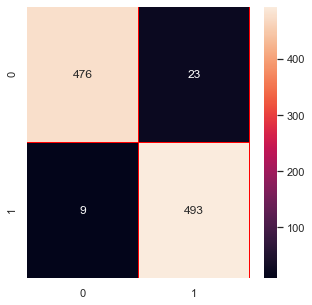

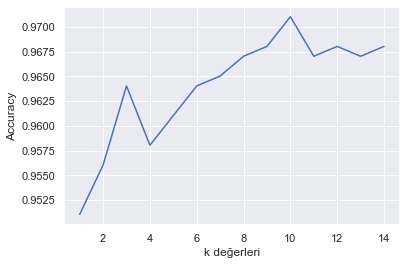

Accuracy:  0.968031968031968
Confusion Matrix :  [[476  23]
 [  9 493]]

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       499
           1       0.96      0.98      0.97       502

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001

KNN için Model Performansının Değerlendirilmesi
MAE: 0.03196803196803197
MSE: 0.03196803196803197
RMSE: 0.17879606250706967
KAPPA SCORE: 0.9360580013334557


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)

#Görselleştirme yapılması 
from sklearn.metrics import confusion_matrix
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
cm = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(cm,annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()

score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test, y_test))

plt.plot(range(1,15), score_list)
plt.xlabel("k değerleri")
plt.ylabel("Accuracy")
plt.show()

y_pred = knn.predict(x_test)

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print("Accuracy: ", knn.score(x_test, y_test))
print("Confusion Matrix : ", cm)
print()
print(classification_report(y_test, y_pred))

print("KNN için Model Performansının Değerlendirilmesi")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#kappa score hesabı
from sklearn.metrics import cohen_kappa_score
kappa_score =cohen_kappa_score(y_test,y_pred)
print("KAPPA SCORE:" ,kappa_score)


## SVM (Support Vector Machine)

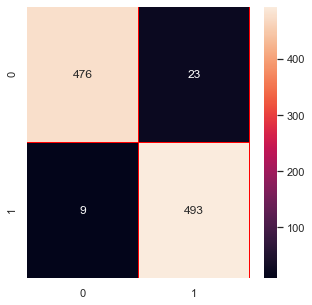

Accuracy:  0.9707057256990679
Confusion Matrix :  [[355  14]
 [  8 374]]

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       369
           1       0.96      0.98      0.97       382

    accuracy                           0.97       751
   macro avg       0.97      0.97      0.97       751
weighted avg       0.97      0.97      0.97       751

SVM için Model Performansının Değerlendirilmesi
MAE: 0.02929427430093209
MSE: 0.02929427430093209
RMSE: 0.17115570192351784
KAPPA SCORE: 0.9413776708605653


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

#Görselleştirme yapılması 
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()

from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)


from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, svm.predict(x_test))
print("Accuracy: ", svm.score(x_test, y_test))
print("Confusion Matrix : ", cm)

y_pred = svm.predict(x_test)
print()
print(classification_report(y_test, y_pred))

print("SVM için Model Performansının Değerlendirilmesi")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#kappa score hesabı
from sklearn.metrics import cohen_kappa_score
kappa_score =cohen_kappa_score(y_test,y_pred)
print("KAPPA SCORE:" ,kappa_score)


## Naive Bayes

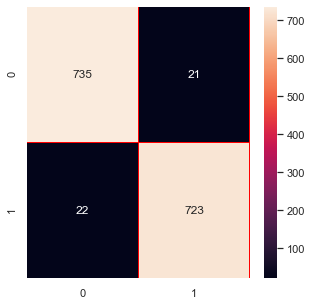

Accuracy:  0.9713524317121919
Confusion Matrix :  [[735  21]
 [ 22 723]]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       756
           1       0.97      0.97      0.97       745

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

Naive Bayes için Model Performansının Değerlendirilmesi
MAE: 0.028647568287808126
MSE: 0.028647568287808126
RMSE: 0.1692559254141731
KAPPA SCORE: 0.9427012266196981


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb.predict(x_test))

#Görselleştirme yapılması 
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()

print("Accuracy: ", nb.score(x_test, y_test))
print("Confusion Matrix : ", cm)

y_pred = nb.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print()
print(classification_report(y_test, y_pred))

print("Naive Bayes için Model Performansının Değerlendirilmesi")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#kappa score hesabı
from sklearn.metrics import cohen_kappa_score
kappa_score =cohen_kappa_score(y_test,y_pred)
print("KAPPA SCORE:" ,kappa_score)



## Decision Tree (Karar Ağacı)

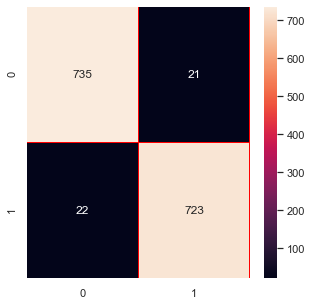

Accuracy:  0.9693741677762983
Confusion Matrix :  [[358  11]
 [ 12 370]]

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       369
           1       0.97      0.97      0.97       382

    accuracy                           0.97       751
   macro avg       0.97      0.97      0.97       751
weighted avg       0.97      0.97      0.97       751

Desicion Tree için Model Performansının Değerlendirilmesi
MAE: 0.03062583222370173
MSE: 0.03062583222370173
RMSE: 0.1750023777658513
KAPPA SCORE: 0.9387328015209503


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Görselleştirme yapılması 
import seaborn as sns
f ,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt.predict(x_test))
print("Accuracy: ", dt.score(x_test, y_test))
print("Confusion Matrix : ", cm)

y_pred = dt.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print()
print(classification_report(y_test, y_pred))

print("Desicion Tree için Model Performansının Değerlendirilmesi")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#kappa score hesabı
from sklearn.metrics import cohen_kappa_score
kappa_score =cohen_kappa_score(y_test,y_pred)
print("KAPPA SCORE:" ,kappa_score)


## Random Forest Classification

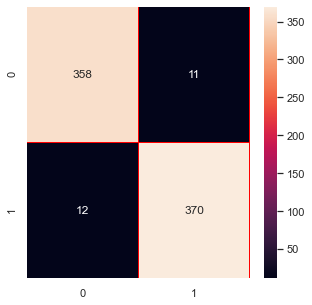

Accuracy:  0.966711051930759
Confusion Matrix :  [[349  13]
 [ 12 377]]

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       362
           1       0.97      0.97      0.97       389

    accuracy                           0.97       751
   macro avg       0.97      0.97      0.97       751
weighted avg       0.97      0.97      0.97       751

Random Forest için Model Performansının Değerlendirilmesi
MAE: 0.033288948069241014
MSE: 0.033288948069241014
RMSE: 0.18245259129220667
KAPPA SCORE: 0.9333295455756031


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)

#Görselleştirme yapılması 
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidth = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(x_test))
print("Accuracy: ", rf.score(x_test, y_test))
print("Confusion Matrix : ", cm)


y_pred = rf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print()
print(classification_report(y_test, y_pred))

print("Random Forest için Model Performansının Değerlendirilmesi")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#kappa score hesabı
from sklearn.metrics import cohen_kappa_score
kappa_score =cohen_kappa_score(y_test,y_pred)
print("KAPPA SCORE:" ,kappa_score)

## Accuracy Değerlerinin Karşılaştırılması

<b> Logistic Regression için Test Accuracy :</b> 0.9675294117647059 <br>
<b>Train Accuracy : </b>0.9707057256990679<br>
<b>KNN için Accuracy :</b> 0.968031968031968 <br>
<b>Support Vector Machine (SVM) için Accuracy :</b> 0.9680426098535286 <br>
<b>Naive Bayes için Accuracy :</b>0.9713524317121919<br>
<b>Decision Tree (Karar Ağacı) için Accuracy :</b>0.9693741677762983<br>
<b>Random Forest Classification için Accuracy :</b>0.966711051930759<br>
    
En yüksek accuracy'nin Naive Bayes algoritması ile alındığı görülür. Naive Bayes kullanarak tahmin yaptırmaya çalışalım : 


## Naive Bayes Algoritması ile Tahmin Ettirme 

### Değerleri hatırlayalım:
"long_hair","forehead_width_cm","forehead_height_cm",
"nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"


In [35]:
x_predict = [[0,14,5.4,1,1,1,1]]  #tahmin edilmesini istediğim değerleri girdim.
y_predict = nb.predict(x_predict)

In [36]:
#Cinsiyet tahmini(male=0, female=1):
y_predict[0] 

0

In [37]:
#Cinsiyet tahmini:
if y_predict[0]==0:
    print("male")
elif y_predict[0]==1:
    print("female")
    

male
